In [4]:
import numpy as np
import matplotlib.pyplot as plt

Multiple Linear Regression

- Models the relationship between multiple independent variables (X₁, X₂, ..., Xₙ) and one dependent variable (Y)
- Formula: $Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε$
- Represents a hyperplane in a multi-dimensional space

I use  3 variables $(x₀, x₁, x₂)$ with coefficients $(b₀, b₁, b₂)$, where $x₀$ is always 1 to account for the intercept term $β₀$.

We are trying to find out $b$ such that $\hat{y} = b^Tx$ creates the line of best fit. For a given value of $b$ and an input $x$ we are finding the error as $(y - \hat{y})$. We sum the error over all points to get the loss function $ \mathscr{L}= \frac{1}{n} \sum (y - b^Tx)$. 

However, this approach has a problem: positive and negative errors cancel each other out. To address this issue, we have two options:

$\frac{1}{n} \sum(y - b^Tx)^2$

$\frac{1}{n} \sum|(y - b^Tx)|$

when we take the absolute value we cant differentiate it. 
When we square it higher errors get amplified and it is differentiable.

It is important to understand the differences between these two funtions. In $\hat{y} = b^Tx$, $b^T$ is fixed and $x$ is varying. $x$ is the input or the parameter to the function. In $\frac{1}{n} \sum (y - b^Tx)^2$, $b^T$ is varying and $x$ is fixed. $b^T$ is the input or the parameter to the function.

By varying $b$ we are trying to minimise the  loss. The optimal value of $b$ in $\hat{y} = b^Tx$ is the Liner regresstion model that we were looking for.

If we look at one point $\hat{y} = b^Tx$, $\hat{y}$ is scaler and $b^T$ and $x$ have p + 1 dimensions. The dot product of $bx$ is $b^Tx$ which is $ \sum b_ix_i$. If we have n points then $\hat{Y} = b^TX$ where $Y$ has $n$ dimensions, $b^T$ has $p + 1$ dimensions and X is a matrix of $(p + 1, n)$ dimensions.

In [5]:
#Understanding
npts = 100
x0 = np.ones(npts)
x1 = np.random.random(npts)
x2 = np.random.random(npts)
b0 = 3
b1 = 1.2
b2 = 2.1
y = b0*x0 + b1*x1 +b2*x2 + np.random.normal(0, 0.001, npts)

#making the vectors into a matrix
X = np.c_[x0, x1, x2]
print(X.shape)

#X transpose into x and the inverses of the whole into x transposetimes y
B = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(B)

(100, 3)
[2.99973289 1.19973014 2.10090818]


## Gradient Descent
Gradient descent is an optimization algorithm used to find values of coefficients $β$ that minimize the cost(lose) function. In my code, Im using it to find the optimal coefficients for my multiple linear regression model.

- if the slope is negative, B increasses. If the slope is positive, B decreasses. 
eta is learning rate: hyper parameter

#### Batch Gradient Descent with Numerical Approximation
In batch gradient descent, we use all data points for each parameter update.

#### Stochastic Gradient Descent with Numerical Approximation
In stochastic gradient descent, we use only one data point for each parameter update.

Both methods approximate the gradient by testing what happens when we make tiny changes to each parameter, rather than using calculus formulas.

In [6]:
#batch gradient decent
eta = 0.01
B = np.random.random(3)
b0 = []
b1 = []
b2 = []

for i in range(10000):
    y_hat = X.dot(B)
    D = y - y_hat
    grad = X.T.dot(D)
    B = B + eta*grad
    b0.append(B[0])
    b1.append(B[1])
    b2.append(B[2])
print(B)

[2.99973289 1.19973014 2.10090818]


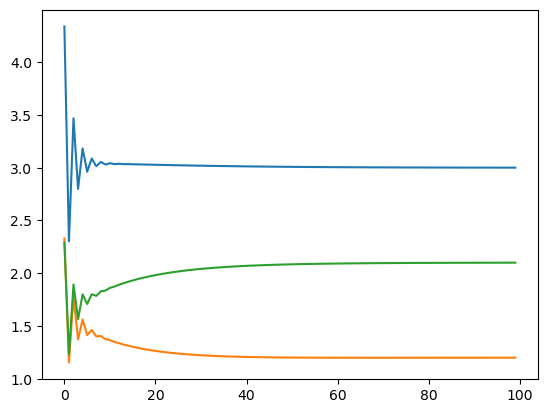

In [7]:
plt.plot(b0[:100])
plt.plot(b1[:100])
plt.plot(b2[:100])

In [14]:
# Numerical gradient descent (central difference method)
eta = 0.01  
delta = 1e-6  #small value for approximation
B = np.random.random(3)  
b0, b1, b2 = [], [], []  

for i in range(10000):
    b0.append(B[0])
    b1.append(B[1])
    b2.append(B[2])
    
    gradient = np.zeros(3)
    for j in range(3):
        B_plus = B.copy()
        B_minus = B.copy()
        
        B_plus[j] += delta
        B_minus[j] -= delta
        
        loss_plus = np.mean((y - X.dot(B_plus))**2)
        loss_minus = np.mean((y - X.dot(B_minus))**2)
        
        gradient[j] = (loss_plus - loss_minus) / (2 * delta)
    
    B = B - eta * gradient

print(B)

[2.99971847 1.19974113 2.10092358]


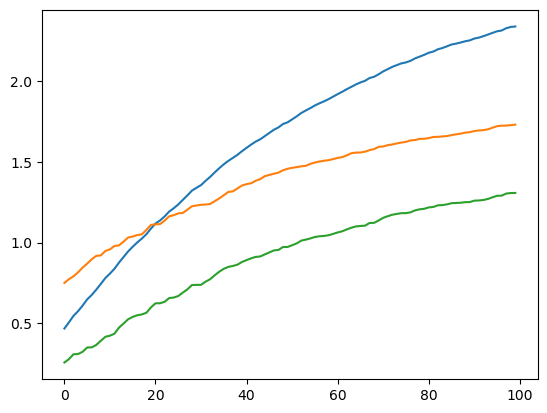

In [13]:
plt.plot(b0[:100])
plt.plot(b1[:100])
plt.plot(b2[:100])

In [9]:
#stochastic gradient decent
eta = 0.01
B = np.random.random(3)
num_points = 100
num_iter = 100000
b0 = []
b1 = []
b2= []

for i in range(num_iter):
    j = i % num_points
    y_hat = X[j].dot(B)
    D = y[j] - y_hat
    grad = X[j].T.dot(D)
    B = B + eta*grad
  
    b0.append(B[0])
    b1.append(B[1])
    b2.append(B[2])
print(B)

[2.99970347 1.19972468 2.10090563]


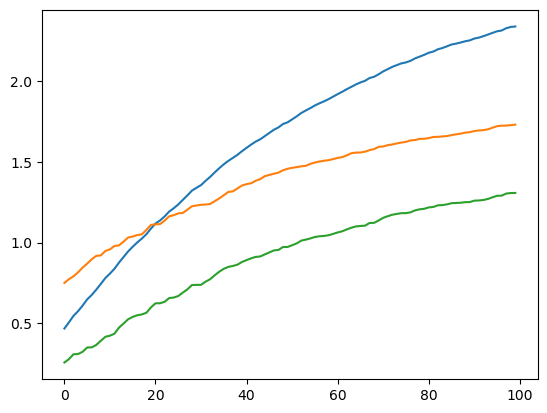

In [10]:
plt.plot(b0[:100])
plt.plot(b1[:100])
plt.plot(b2[:100])
plt.show()

In [17]:
# Stochastic gradient descent with numerical gradient approximation
eta = 0.01
delta = 1e-6
B = np.random.random(3)
num_points = 100
num_iter = 100000
b0 = []
b1 = []
b2 = []

for i in range(num_iter):
    j = i % num_points 
    
    gradient = np.zeros(3)
    for k in range(3):
        B_plus = B.copy()
        B_minus = B.copy()
        
        B_plus[k] += delta
        B_minus[k] -= delta
        
        
        loss_plus = (y[j] - X[j].dot(B_plus))**2
        loss_minus = (y[j] - X[j].dot(B_minus))**2
        
        gradient[k] = (loss_plus - loss_minus) / (2 * delta)
    
    B = B - eta * gradient
    
    b0.append(B[0])
    b1.append(B[1])
    b2.append(B[2])

print(B)

[2.99967203 1.19971607 2.10089215]


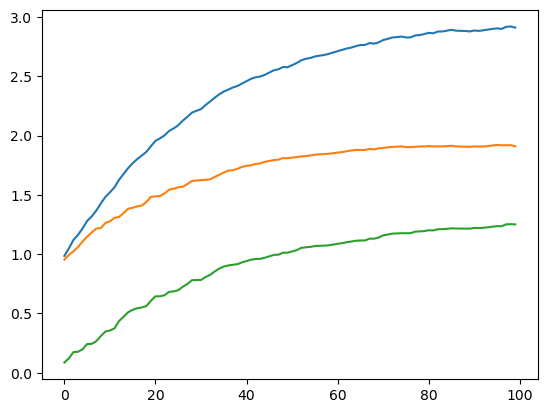

In [16]:
plt.plot(b0[:100])
plt.plot(b1[:100])
plt.plot(b2[:100])
plt.show()

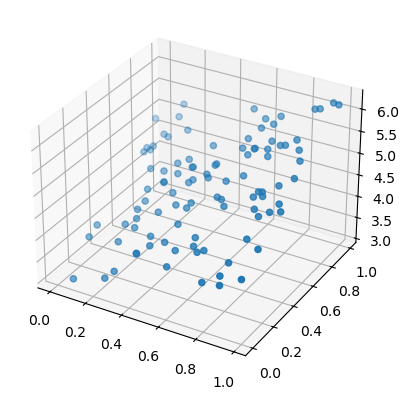

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x1, x2, y)

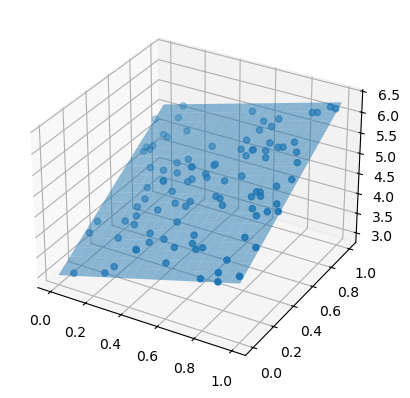

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y)

# Create a meshgrid for plotting the plane
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 1, 20), np.linspace(0, 1, 20))
x0_grid = np.ones(x1_grid.shape)

# Calculate the predicted values using the learned coefficients
y_pred = B[0]*x0_grid + B[1]*x1_grid + B[2]*x2_grid

# Add the plane to the plot
ax.plot_surface(x1_grid, x2_grid, y_pred, alpha=0.5)

plt.show()